# 分類問題ー単純な機械学習アルゴリズムの訓練

『Pythonによる機械学習プログラミング』2章

https://github.com/rasbt/python-machine-learning-book-3rd-edition

## パーセプトロンの学習アルゴリズムをPythonで実装してみる

パーセプトロンの特徴は、

- m次元の入力ベクトル **x** 、重みベクトル **w** の線形和を入力として受け取り
- 決定関数、あるいは活性化関数Φを適用して、出力値を決定する
- 活性化関数は、単位ステップ関数 unit step function を採用する

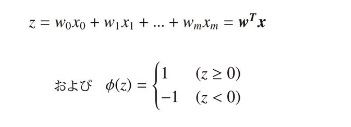

<br>

2次元の絵で表現するとこうなる。

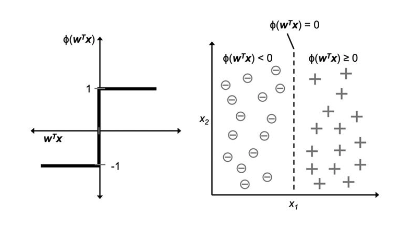

m=2として、決定境界は、

$$
    0 = w_1 * x_1 + w_2 * x_2 \\
    x_2 = -\frac{w_1}{w_2}x_1
$$

と表されるので、一次関数の線になる。線形分離可能な問題のみが対象となる。

真の意味で、まだ理解できていないのだが、i番目のデータでの学習ループにおける、j次元目の重みの更新式は以下のようになる。 

`{⊿w_j} = {学習率} * {正解値 - 予測値} * {x_j}`

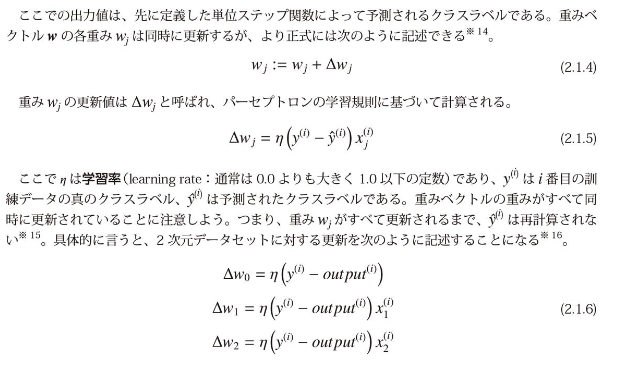

### Libraries

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
sns.set()

In [3]:
# 実装してみる
class Perceptron(object):
    """Perceptron classifier
    
    Params
    --------------
    eta : 学習率(0.0 ~ 1.0)
    n_iter : 訓練データの訓練回数
    seed : 重み初期化のための乱数シード
    
    Attributes
    --------------
    w_ : 適合後の重み 1d-array
    errors_ : 各エポックでの誤分類の数
    """
    def __init__(self, eta: float=0.01, n_iter: int=100, seed: int=1):
        self.eta = eta
        self.n_iter = n_iter
        self.seed = seed
    
    def net_input(self, X) -> float:
        """総入力（線形和）
            X: 1d-array
        """
        # w[0] はバイアス項。X_0 は1であると考えている。
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X) -> int:
        """推論
            X: 1d-array
        """
        return np.where(self.net_input(X) >= 0.0, 1, -1)
    
    def _step_function(self, z: float=None, unit: int=1) -> int:
        return 1 * unit if z >= 0.0 else 0
    
    def fit(self, X, y):
        """学習
        X : array-like
            (r, c) = (n_samples, n_features)
        y : array-like
            (r, c) = (n_samples, 1)
        """
        rand_generator = np.random.RandomState(self.seed)
        # 重みはXの列数＋1次元（バイアスの分）
        self.w_ = rand_generator.normal(loc=0.0, scale=0.01, size=1+X.shape[1])
        
        # 1データ当たりの訓練回数分訓練を繰り返す
        for _ in range(self.n_iter):
            self.errors = []
            # 全サンプルについて訓練を実施
            for x_i, y_i in zip(X, y):
                y_out = self.predict(x_i)
                # 全featureについて重み更新
                delta_w_i_0 = self.eta * (y_i - y_out)
                delta_w_i_ = self.eta * (y_i - y_out) * x_i
                self.w_[0] += delta_w_i_0
                self.w_[1:] = self.w_[1:] + delta_w_i_
                # append error flg
                self.errors.append(1 if int(y_i - y_out) != 0 else 0)
            # 当該エポックに関するエラーの数をチェック
            err_bar = ['■'] * sum(self.errors)
            print(''.join(err_bar))
        return self

In [4]:
import random
X = np.array(np.random.randn(3000)).reshape(1000, 3)
y = random.choices([1, 0], k=10)

In [5]:
model = Perceptron()
model.fit(X, y)

■■■■■■■■■■
■■■■■■■■■■
■■■■■■■■■■
■■■■■■■■■■
■■■■■■■■■
■■■■■■■■■■
■■■■■■■■
■■■■■■■■
■■■■■■■■■
■■■■■■■■■■
■■■■■■■■■■
■■■■■■■■■
■■■■■■■■■■
■■■■■■■■■■
■■■■■■■■■■
■■■■■■■■■■
■■■■■■■■■
■■■■■■■■■■
■■■■■■■■
■■■■■■■■■
■■■■■■■■■■
■■■■■■■■■
■■■■■■■■■
■■■■■■■■■■
■■■■■■■■■■
■■■■■■■■■■
■■■■■■■■■
■■■■■■■■■■
■■■■■■■■
■■■■■■■■■
■■■■■■■■■■
■■■■■■■■■
■■■■■■■■■■
■■■■■■■■■■
■■■■■■■■■■
■■■■■■■■■■
■■■■■■■■■
■■■■■■■■
■■■■■■■■■
■■■■■■■■■■
■■■■■■■■■
■■■■■■■■
■■■■■■■■■
■■■■■■■■■
■■■■■■■■
■■■■■■■■■■
■■■■■■■■■■
■■■■■■■■■■
■■■■■■■■■
■■■■■■■■■■
■■■■■■■■■■
■■■■■■■■■■
■■■■■■■■■
■■■■■■■■
■■■■■■■■■
■■■■■■■■■
■■■■■■■■■■
■■■■■■■■
■■■■■■■■
■■■■■■■■■■
■■■■■■■■■
■■■■■■■■■■
■■■■■■■■■
■■■■■■■■■■
■■■■■■■■
■■■■■■■■■
■■■■■■■■■■
■■■■■■■■■
■■■■■■■■■■
■■■■■■■■■■
■■■■■■■■■
■■■■■■■■■■
■■■■■■■■■■
■■■■■■■■
■■■■■■■■■
■■■■■■■■■
■■■■■■■■
■■■■■■■■■■
■■■■■■■■■■
■■■■■■■■■
■■■■■■■■■■
■■■■■■■■■■
■■■■■■■■■■
■■■■■■■■■■
■■■■■■■■■
■■■■■■■■
■■■■■■■■■
■■■■■■■■■
■■■■■■■■■■
■■■■■■■■
■■■■■■■■
■■■■■■■■■■
■■■■■■■■■
■■■■■■■■■■
■■■■■■■■
■■■■■■■■■■
■■■■■■■■■

## パーセプトロン実装（答え）

In [6]:
class Perceptron_(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [7]:
ppn = Perceptron_(eta=0.1, n_iter=100)

X = np.array(np.random.randn(3000)).reshape(1000, 3)
y = random.choices([1, 0], k=10)

ppn.fit(X, y)

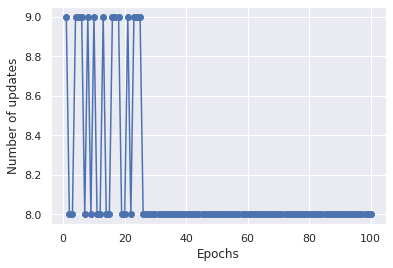

In [8]:
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

# plt.savefig('images/02_07.png', dpi=300)
plt.show()

## Irisデータでパーセプトロンを学習させる

ただし、簡単のため、以下の制約をつける

- 特徴量は、「がく片の長さ」「花びらの長さ」の２つのみ
- ２値分類のため、「Setosa」「Versicolor」のみを対象とする


ただし、パーセプトロンも多クラス分類に応用可能。手法としては、One-vs-All / One-vs-Rest などと呼ぶ。

- 各クラスごとに2値分類モデルをつくり
- 対象クラスを陽性、それ以外を陰性として学習する

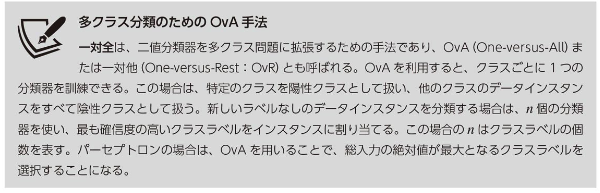

<br>

---

In [9]:
s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
print('URL:', s)

df_iris = pd.read_csv(s,
                 header=None,
                 encoding='utf-8')

df_iris.tail()

URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


<br>

- select cols
    - 0 : sepal len
    - 2 : petal len
- select rows
    - df[4] != Iris-virginica

In [16]:
train_df = df_iris.rename({0: 'sepal_len', 2: 'petal_len', 4: 'kind'}, axis='columns')

In [18]:
train_df_ = train_df[['sepal_len', 'petal_len', 'kind']].copy()

<AxesSubplot:xlabel='sepal_len', ylabel='petal_len'>

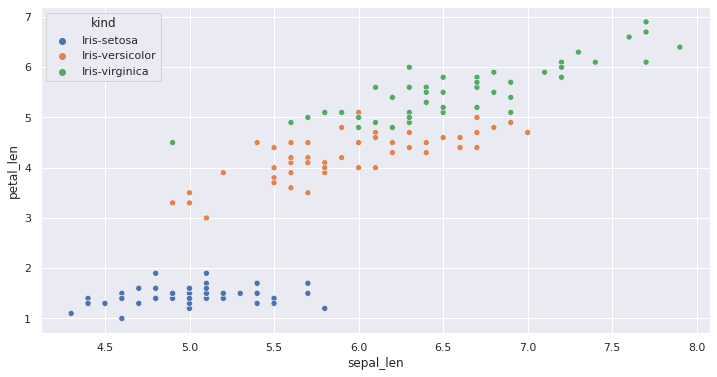

In [20]:
fig = plt.figure(figsize=(12, 6))
ax = fig.subplots()
sns.scatterplot(data=train_df_, x='sepal_len', y='petal_len', hue='kind', ax=ax)

In [32]:
train = train_df_[train_df_['kind'] != 'Iris-virginica'].copy()
y = np.where(train['kind'].values == 'Iris-setosa', 1, -1)
X = train[train.columns[:2]].values

<AxesSubplot:xlabel='sepal_len', ylabel='petal_len'>

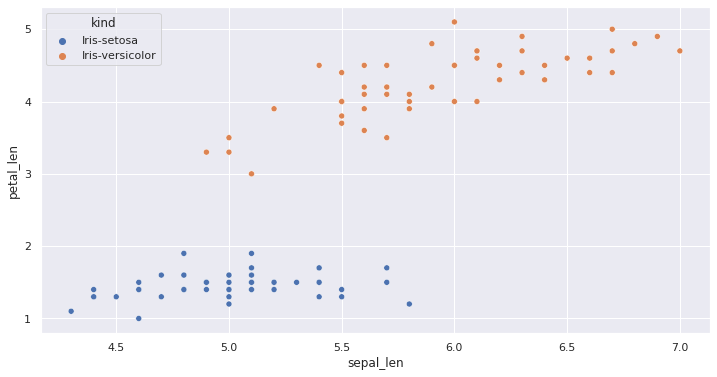

In [33]:
fig = plt.figure(figsize=(12, 6))
ax = fig.subplots()
sns.scatterplot(data=train, x='sepal_len', y='petal_len', hue='kind', ax=ax)

In [34]:
ppn = Perceptron_(eta=0.1, n_iter=20)
ppn.fit(X, y)

Text(0, 0.5, 'Number of updates')

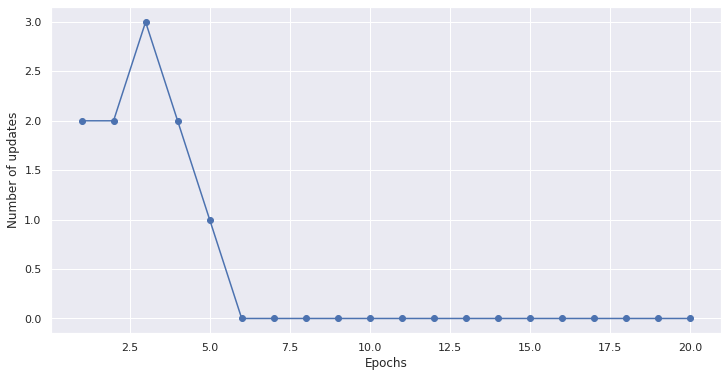

In [35]:
fig = plt.figure(figsize=(12, 6))
ax = fig.subplots()

ax.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
ax.set_xlabel('Epochs')
ax.set_ylabel('Number of updates')

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑

もし、ラベルを 1/0 にしていたら、50 に収束する（↓がその証拠）

<br>

In [36]:
y_alt = np.where(train['kind'].values == 'Iris-setosa', 1, 0)

Text(0, 0.5, 'Number of updates')

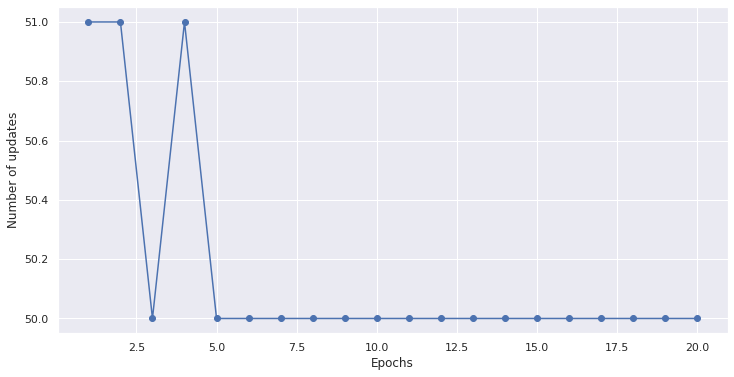

In [38]:
ppn_alt = Perceptron_(eta=0.1, n_iter=20)
ppn_alt.fit(X, y_alt)

fig = plt.figure(figsize=(12, 6))
ax = fig.subplots()

ax.plot(range(1, len(ppn_alt.errors_) + 1), ppn_alt.errors_, marker='o')
ax.set_xlabel('Epochs')
ax.set_ylabel('Number of updates')

<font color=red size=10>**↓↓↓ここから！！！！**</font>

### Q: なぜ1/0にすると50に収束するのか説明せよ

抽象的に言えば、ずばり、Perceptronクラスのfitメソッドに実装した更新式は、ラベルが1/-1であることを前提にしているのに、そうなっていないから。

具体的に言えば、重みは更新されない。

In [ ]:
# 学習済モデルで分離線を引いてみる
# A -> x_1, B -> x_2
# x_2 = - (w_1/w_2)*x_1 + w_0
